In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [70]:
RATE = 44100
AMPLITUDE_LIMIT = 1000

In [71]:
def detect_pitch(data):
    data = data - np.mean(data)  # Remove DC offset
    windowed = data * np.hanning(len(data))  # Apply Hann window
    corr = np.correlate(windowed, windowed, mode='full')
    corr = corr[len(corr)//2:]
    if np.max(corr) > 0:
        corr = corr / np.max(corr)  # Normalize autocorrelation
    else:
        return 0
    min_period = int(RATE / 2000)  # Max pitch 2000 Hz
    max_period = int(RATE / 80)    # Min pitch 80 Hz
    if max_period >= len(corr): return 0
    search_corr = corr[min_period:max_period]
    if len(search_corr) == 0: return 0
    peak_idx = np.argmax(search_corr) + min_period
    if corr[peak_idx] > 0.3:
        pitch = RATE / peak_idx
        return pitch
    return 0

In [72]:
t = np.arange(0, RATE) / RATE
freq = 440  # A4 note
signal = 0.5 * np.sin(2 * np.pi * freq * t)

In [73]:
detected_pitch = detect_pitch(signal)
print(f"Detected pitch: {detected_pitch:.2f} Hz")

Detected pitch: 441.00 Hz


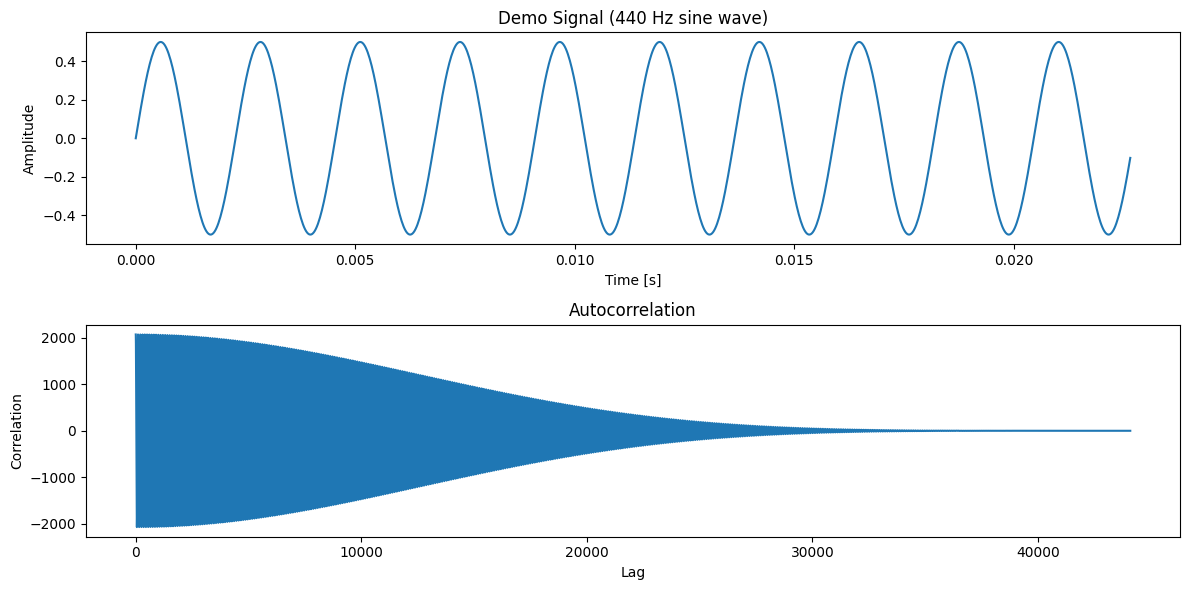

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t[:1000], signal[:1000])
plt.title('Demo Signal (440 Hz sine wave)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
windowed = signal * np.hanning(len(signal))
corr = np.correlate(windowed, windowed, mode='full')
corr = corr[len(corr)//2:]
plt.plot(corr)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()